In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_boston

In [14]:
boston = load_boston()
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import Ridge

In [16]:
X, y = boston.data, boston.target

In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

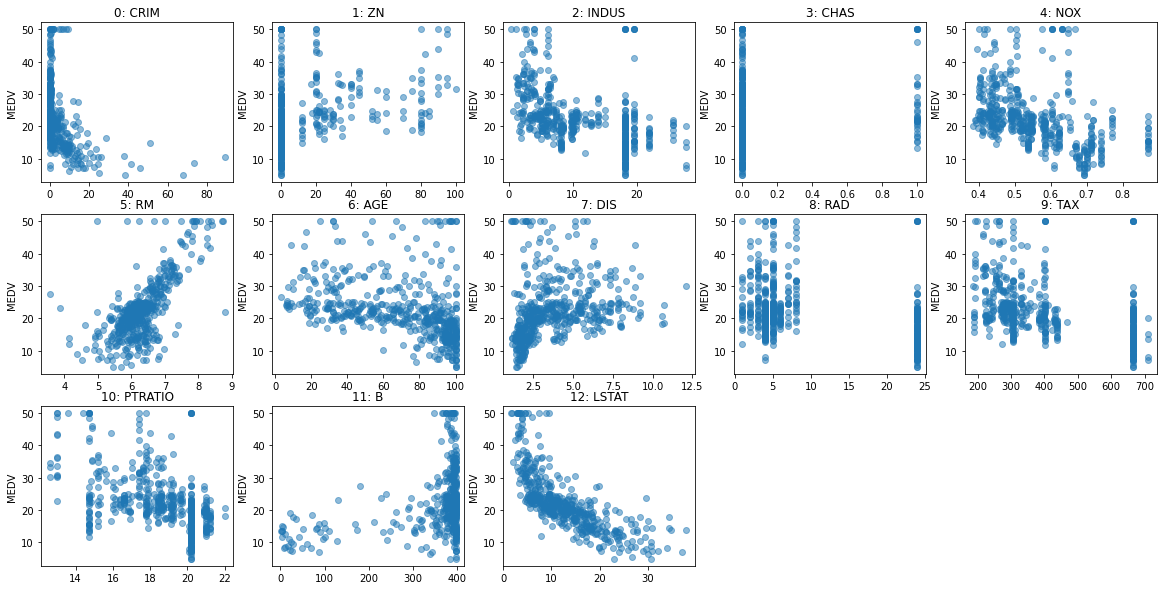

In [18]:
fig , axes =  plt.subplots(3,5, figsize = (20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha = .5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel('MEDV')

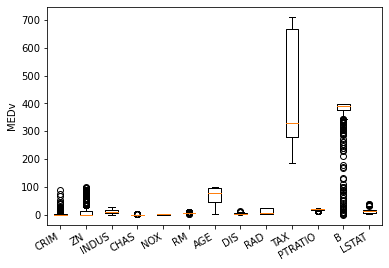

In [19]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation =30, ha = 'right' )
plt.ylabel('MEDv')
plt.show()

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)

ridge.score(X_test_scaled, y_test)

0.6345884564889053

# scaling with ridge and knn


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(Ridge(), X_train, y_train, cv = 10)
np.mean(scores), np.std(scores)

(0.715273454590047, 0.12914938819299657)

In [22]:
#with scaling
scores = cross_val_score(Ridge(), X_train_scaled, y_train, cv = 10)
np.mean(scores), np.std(scores)

(0.7173588732222989, 0.1248914281862037)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv = 10)
np.mean(scores), np.std(scores)

(0.49901769734878754, 0.14591687508635423)

In [24]:
#with scaling
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv = 10)
np.mean(scores), np.std(scores)

(0.7502341979953769, 0.10562600471156966)

# pipelines

In [25]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6345884564889053

In [26]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv =10)
np.mean(scores), np.std(scores)

(0.7455608822349746, 0.10625173604969354)

In [27]:
print(knn_pipe.steps)

[('standardscaler', StandardScaler()), ('kneighborsregressor', KNeighborsRegressor())]


In [28]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((('scaler', StandardScaler()),
               ('regressor', KNeighborsRegressor)))

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1,10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


# Discrete Features 

In [31]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [32]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan']]
df

,boro,boro_ordinal,vegan
0,Manhattan,2,No
1,Queens,3,No
2,Manhattan,2,No
3,Brooklyn,1,Yes
4,Brooklyn,1,Yes
5,Bronx,0,No


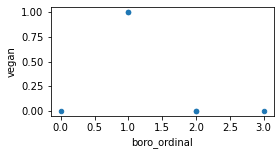

In [33]:
df_int = df.copy()
df_int['vegan'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.show()

In [34]:
df2 = df[['boro_ordinal', 'vegan']]

In [35]:
df2['boro'] = df.boro.astype("category").cat.codes

df2.drop(['boro_ordinal'], axis =1, inplace =True)

In [36]:
#ONE HOT ENCODING
dum = pd.get_dummies(df2, columns = ['boro'])
dum

,vegan,boro_0,boro_1,boro_2,boro_3
0,No,0,0,1,0
1,No,0,0,0,1
2,No,0,0,1,0
3,Yes,0,1,0,0
4,Yes,0,1,0,0
5,No,1,0,0,0


# one hot encoding with sklearn

In [37]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1, 0, 2, 2, 3]})


In [38]:
df

,salary,boro
0,103,0
1,89,1
2,142,0
3,54,2
4,63,2
5,219,3


In [39]:
ohe = OneHotEncoder().fit(df)
ohe.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
#the feature


# computing all preprocessing steps at once


In [45]:
categorical = df.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical), #~ means negation
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression())

In [44]:
~categorical

salary    True
boro      True
dtype: bool

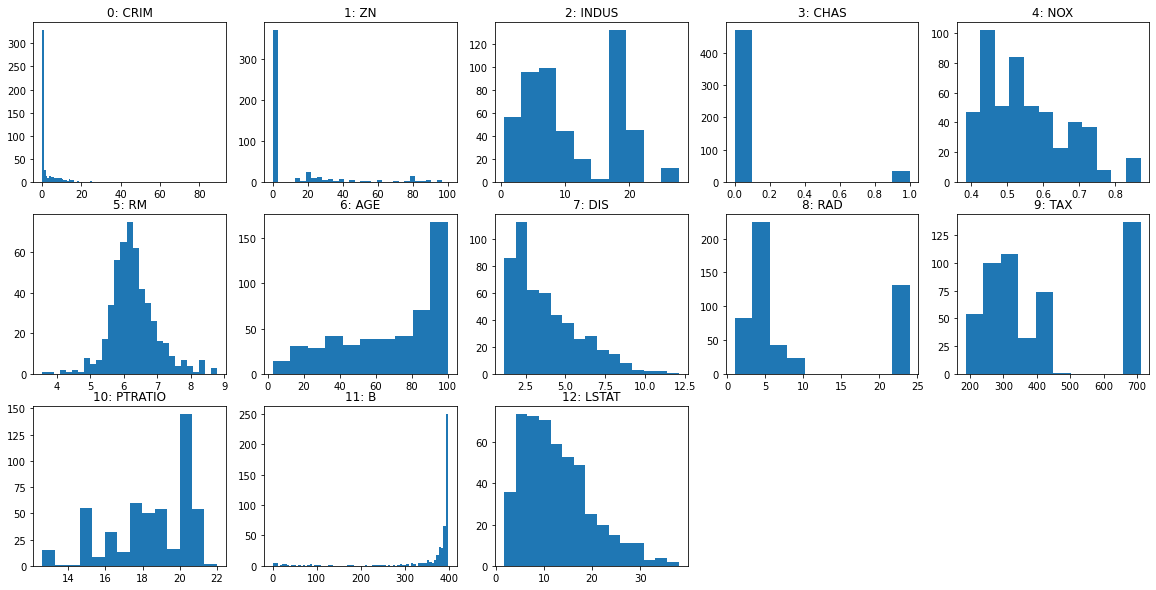

In [46]:
fig, ax = plt.subplots(3,5, figsize =(20, 10))
for i, ax in enumerate(ax.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X[:, i], bins = 'auto')
    ax.set_title('{}: {}'.format(i, boston.feature_names[i]))

# applying power Transformer

In [47]:
from sklearn.preprocessing import PowerTransformer

[ -0.96937931  -0.84391022   0.32995364 -21.87117034  -3.67187316
   0.34966385   1.38731429  -0.4936954   -0.41443397  -0.57498358
   4.7519314    3.81530055   0.14080347]


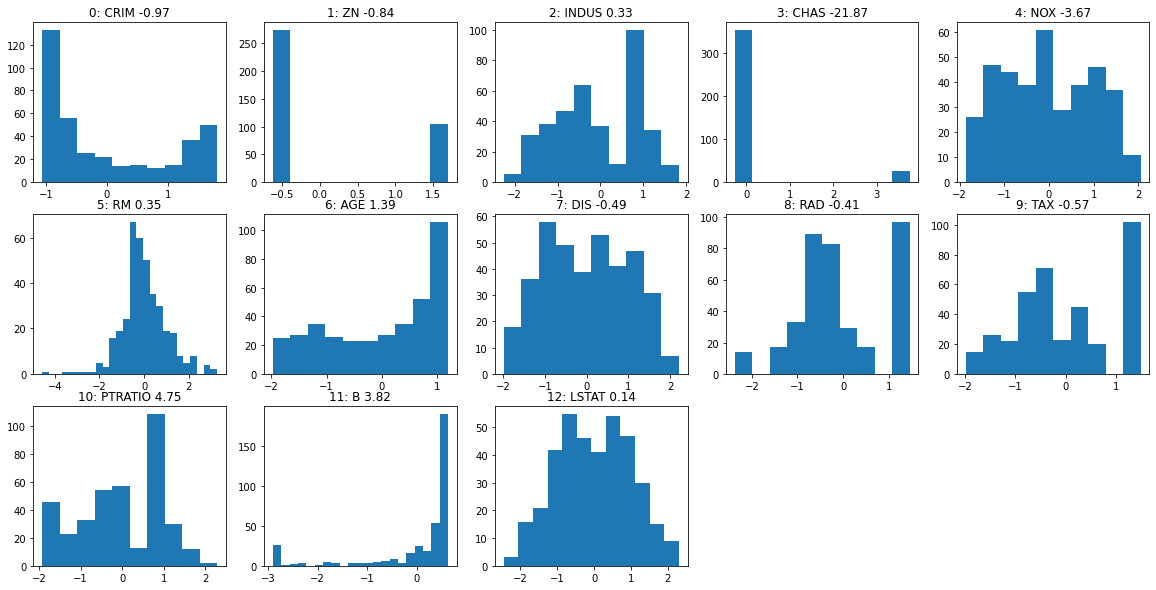

In [53]:
fig, ax = plt.subplots(3,5, figsize = (20, 10))
pt = PowerTransformer()
x_bc = pt.fit_transform(X_train)
print(pt.lambdas_)

for i, ax in enumerate(ax.ravel()):
    if i >12:
        ax.set_visible(False)
        continue
    ax.hist(x_bc[:,i], bins = 'auto')
    ax.set_title('{}: {} {:.2f}'.format(i, boston.feature_names[i], pt.lambdas_[i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C1E437DA0>,
      dtype=object)

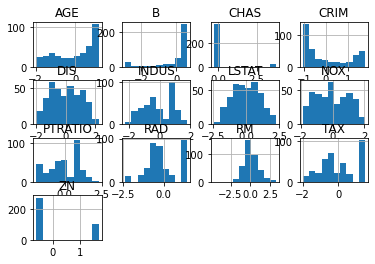

In [103]:
df_pt.hist()